<h1 align="center">
<img src="https://drive.google.com/uc?export=view&id=1_ZkE3dnYg9KykzdZE6lIK2s_q_nbiKk_" width="160" height="160">
</h1>
<h1 align="center">CHW1 Communication Systems</h1>
<h3 align="center">Behdad Tabatabaei (SID:400104278) </h3>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>Fall 2023</h5>

---

# ***Question 1***

*   Section 1.1

In [2]:
# import required libraries:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definition of function x:
def x(t,t0,f0):
  if(t<t0):
    return 0
  else:
    return (np.power(t-t0,4))*(np.power(np.e,-t+t0))*(np.power(np.cos(2*np.pi*f0*(t-t0)),2))
x = np.frompyfunc(x, 3, 1) # Prepare for array input

*   Section 1.2

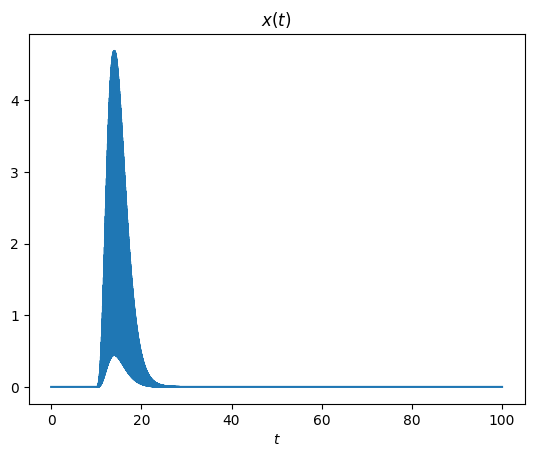

In [4]:
# Enter the given values:
f0=10
t0=10
incrementsx = 0.01
dx = 100
t=np.arange(0,dx,incrementsx)
# Draw the plot:
plt.title("$x(t)$")
plt.xlabel("$t$")
plt.plot(t,x(t,t0,f0))
plt.show()

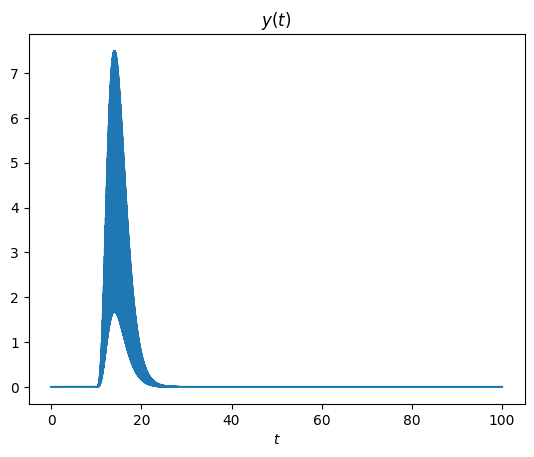

In [5]:
# Enter the given values:
td = t0/3.0
k=0.4
B = 0.5
# Definition of function H:
def H(f):
  global td,k,B,t0
  if np.abs(f)>B:
    return 0
  else:
    return (1+np.cos(2*np.pi*k*f*t0))* np.exp(-2*np.pi*f*td*1j )
H = np.frompyfunc(H, 1, 1) # Prepare for array input
# Calculate the FFT function of x:
x_fft = np.fft.fft(x(t,t0,f0))
freq = np.fft.fftfreq(t.shape[-1])
# Calculate the FFT function of y:
y_fft = x_fft*H(freq)
# Calculate of function y:
y = np.real(np.fft.ifft(y_fft))
# Draw the plot:
plt.title("$y(t)$")
plt.xlabel("$t$")
plt.plot(t,y)
plt.show()

*   Section 1.3

We have:
$$y(t)-\alpha y(t-T_0)-\beta y(t-2T_0)=x(t)$$
We take the Fourier transform from both sides:
$$Y(f)-\alpha e^{-j2\pi T_0f} Y(f)-\beta e^{-j4\pi T_0 f}Y(f)=X(f)$$
So:
$$\frac{Y(f)}{X(f)}=H(f)=\frac{1}{1-\alpha e^{-j2\pi T_0f} -\beta e^{-j4\pi T_0 f}}$$

*   Section 1.4

In [6]:
# import required library:
import sympy as sp
a = 0.3 # Enter the given value:
# Calculate the cdf of the random variable beta:
z = sp.Symbol('b')
pdfbeta = z*np.e**(-z*z/2) # Definition of pdf beta
cdfbeta = sp.integrate(pdfbeta, z)
dc = 1-cdfbeta.subs({'b' : np.inf})
cdfbeta = cdfbeta + dc
# Calculate the inverse cdf:
y = sp.Symbol('y')
inv = sp.solve(cdfbeta - y, z)
# Taking some random samples from beta:
N = 3
b = []
for i in range(N):
  r = inv[1].subs({'y': np.random.uniform()}).evalf()
  b = np.append(b , [r])
b = b.astype(float)
# print Beta with latex:
from IPython.display import Latex
texb = r" \beta = \{"+ str(round(b[0],3)) +", \; "+ str(round(b[1],3)) +", \; "+ str(round(b[2],3)) +"\}"
# Definition of function H:
def H(f,be):
  global a, t0
  return 1/(1 - a*np.exp(-2*np.pi*t0*f*1j)- be*np.exp(-4*np.pi*t0*f*1j))
H = np.frompyfunc(H, 2, 1) # Prepare for array input
# show latex
Latex(texb)

<IPython.core.display.Latex object>

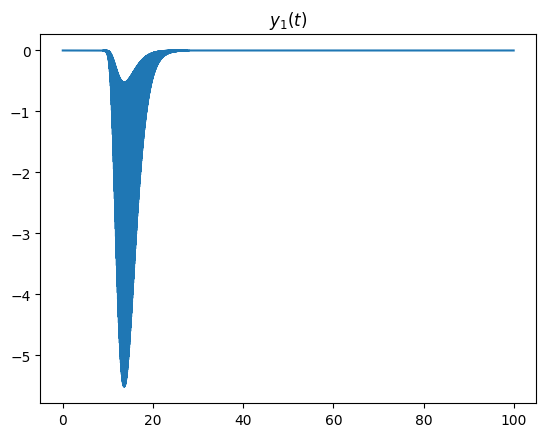

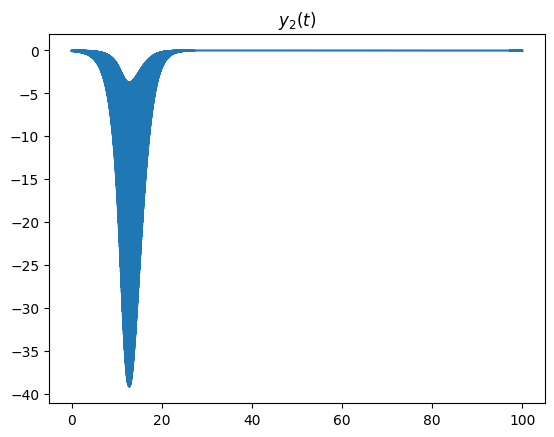

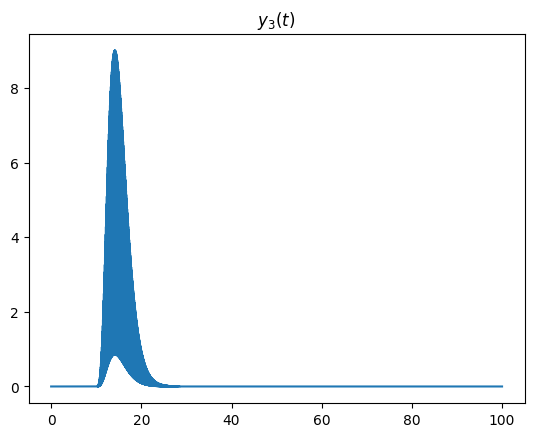

<Figure size 640x480 with 0 Axes>

In [7]:
yt =np.zeros([len(t),N])
for i in range(N):
  # Calculate the FFT function of y_i:
  temp = x_fft*H(freq,b[i])
  yt[:,i] = np.real(np.fft.ifft(temp))

# Draw the plots:
plt.title(r"$y_1(t)$")
plt.plot(t,yt[:,0])
plt.figure()
plt.title(r"$y_2(t)$")
plt.plot(t,yt[:,1])
plt.figure()
plt.title(r"$y_3(t)$")
plt.plot(t,yt[:,2])
plt.figure()
plt.show()

*   Section 1.5

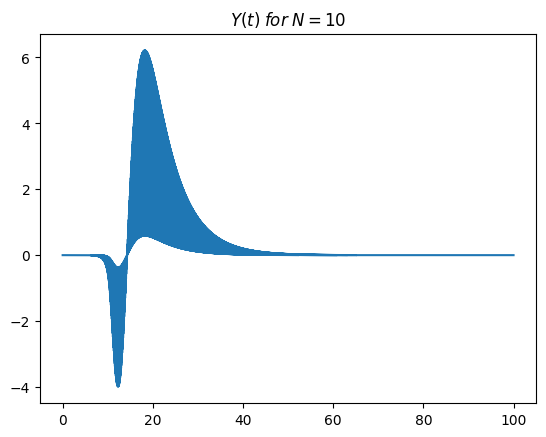

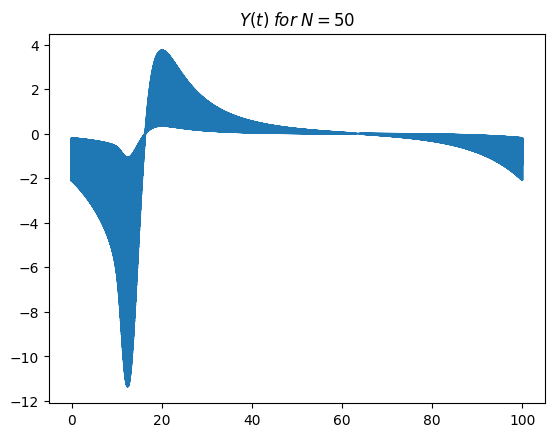

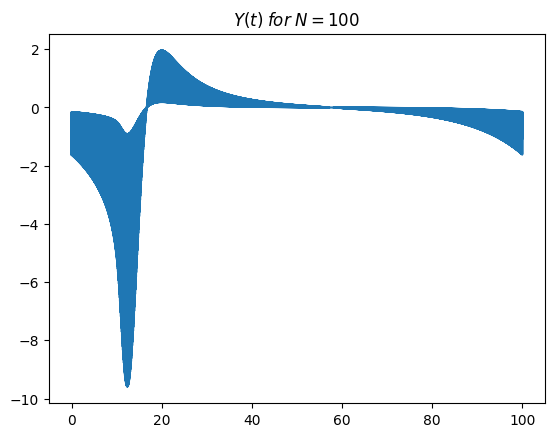

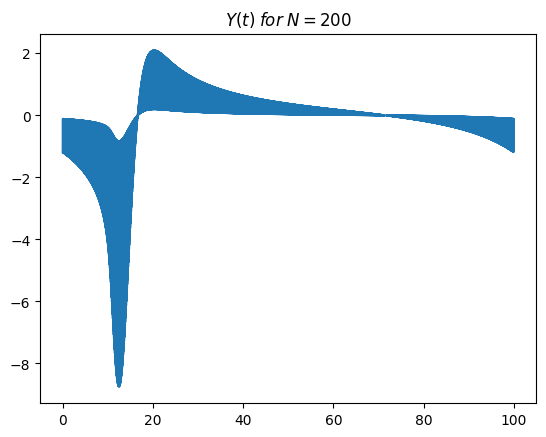

<Figure size 640x480 with 0 Axes>

In [8]:
# Taking some random samples from beta:
N = 200
b = []
for i in range(N):
  r = inv[1].subs({'y': np.random.uniform()}).evalf()
  b = np.append(b , [r])
b = b.astype(float)
# Calculate y:
yt =np.zeros([N,len(t)])
for i in range(N):
  temp = x_fft*H(freq,b[i])
  yt[i,:] = np.real(np.fft.ifft(temp))
  if i==9:
    y1= sum(yt)/10.0
  elif i == 49:
    y2= sum(yt)/50.0
  elif i== 99:
    y3= sum(yt)/100.0
  elif i == 199:
    y4= sum(yt)/200.0

# Draw the plots:
plt.title("$Y(t)\;for \;N =10$")
plt.plot(t,y1)
plt.figure()
plt.title("$Y(t)\;for \;N =50$")
plt.plot(t,y2)
plt.figure()
plt.title("$Y(t)\;for \;N =100$")
plt.plot(t,y3)
plt.figure()
plt.title("$Y(t)\;for \;N =200$")
plt.plot(t,y4)
plt.figure()
plt.show()

*   Section 1.6

We have:
$$H(f)=\frac{1}{1-\alpha e^{-j2\pi T_0f} -\beta e^{-j4\pi T_0 f}}$$
Let $z=e^{-j2\pi T_0f}$ then:
$$H(f)=\frac{1}{1-\alpha z -\beta z^2}$$
We have from the Taylor expansion:
$$H(f)=\sum_{n=0}^{\infty} a_nz^n=\sum_{n=0}^{\infty} a_ne^{-j2\pi nT_0f}$$
Then we take the inverse Fourier transform:
$$y(t)=\sum_{n=0}^{\infty}a_n \times x(t-nT_0)$$
This expression means that we have received the signal $x(t)$ from a large number of channels with different delays and different sizes.

This relationship shows the multipath effect of the channel.

# ***Question 2***

* Section 2.1

We have:
$$H_{eq}(f)=\frac{ke^{-2j\pi fT_0}}{H_C(f)}=\frac{ke^{-2j\pi fT_0}}{\frac{1}{1-\alpha e^{-j2\pi T_0f} -\mathbb{E}[\beta] e^{-j4\pi T_0 f}}}=ke^{-2j\pi fT_0} \begin{pmatrix} 1-\alpha e^{-j2\pi T_0f} -\mathbb{E}[\beta] e^{-j4\pi T_0 f} \end{pmatrix}=$$

$$ke^{-2j\pi fT_0} - k\alpha e^{-4j\pi fT_0}-k\mathbb{E}[\beta] e^{-6j\pi fT_0}$$
So:
$$\tilde{x}_3(t)=ky(t-T_0)-k\alpha y(t-2T_0)- k\mathbb{E}[\beta] y(t-3T_0)$$
that the above relationship is equivalent to a **3-Tapped-Delay Line Equalizer** where:
$$C_0=0,\;\;C_1=k, \;\; C_2=k\alpha, \;\; C_3=k\beta$$
$$T_1=t_0, \;\; T_2=t_0, \;\; T_3=t_0$$




* Section 2.2

We have:
$$H_{eq}(f)=\frac{ke^{-2j\pi fT_0}}{H_C(f)}=\frac{ke^{-2j\pi fT_0}}{1+\gamma e^{-2j\pi T_0 f}}=\frac{k}{e^{2j\pi fT_0}+\gamma}$$
Let $z=e^{2j\pi fT_0}$ then:
$$H_{eq}(f)=\frac{k}{z+\gamma}=-\frac{k}{\gamma} \times \frac{1}{(-\frac{z}{\gamma})-1} =-\frac{k}{\gamma} \sum_{n=1}^{\infty}(-\frac{z}{\gamma})^{-n} =-\frac{k}{\gamma} \sum_{n=1}^{\infty}(-\gamma)^nz^{-n}  $$
Note that the above relation holds only if $1<|-\frac{z}{\gamma}|$ Let us have $|-\frac{z}{\gamma}|=\frac{|z|}{|\gamma|}=\frac{1}{0.3}=3$, so the condition is satisfied. So:
$$H_{eq}(f)=-\frac{k}{\gamma} \sum_{n=1}^{\infty}(-\gamma)^{n}e^{-2j\pi fnT_0}$$
Then:
$$\tilde{x}_m(t)=-\frac{k}{\gamma} \sum_{n=1}^{\infty}(-\gamma)^{n}y(t-nT_0)$$
So:
$$C_0=0,\;\;C_{m>0}=-\frac{k}{\gamma}(-\gamma)^{m}=k(-\gamma)^{m-1}$$
$$T_i=T_0$$


* Section 2.3

Let $k = 1$

In [73]:
from scipy.integrate import simpson # To get the integral
# Just to display the output more beautifully:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
import pandas as pd
# Enter the given values:
M = 10
C = [0]
k = 1
gamma = 0.3
# Calculate the value of C from the obtained theoretical relationship:
for i in range(M):
  C = np.append(C,k*np.power(-gamma,i))
# Definition of y according to the relationship:
def y(t,t0,f0):
  return x(t,t0,f0)+gamma*x(t-t0,t0,f0)
# Defining xm for different values of m:
xm = C[0]*y(t,t0,f0)+C[1]*y(t-t0,t0,f0)+C[2]*y(t-2*t0,t0,f0)+C[3]*y(t-3*t0,t0,f0)
for i in range(3,M):
  if i == 3:
    xm = np.vstack([xm,xm+C[i+1]*y(t-(i)*t0,t0,f0)])
  else:
    xm = np.vstack([xm,xm[-1,:]+C[i+1]*y(t-(i)*t0,t0,f0)])
# Definition of yhat:
yhat = k*x(t-t0,t0,f0)
# Error calculation:
error = []
for i in range(2,M):
  error = np.append(error, simpson(np.abs(xm[i-2,:]-yhat)**2,t))

# Display output:
erdf = {r"m" : range(3,M+1),
        r"error": error}
df = pd.DataFrame(erdf)
display(df.style.hide_index());

m,error
3,0.021528
4,0.031743
5,0.042796
6,0.042595
7,0.042580
8,0.042579
9,0.042579
10,0.042579


* Section 2.4

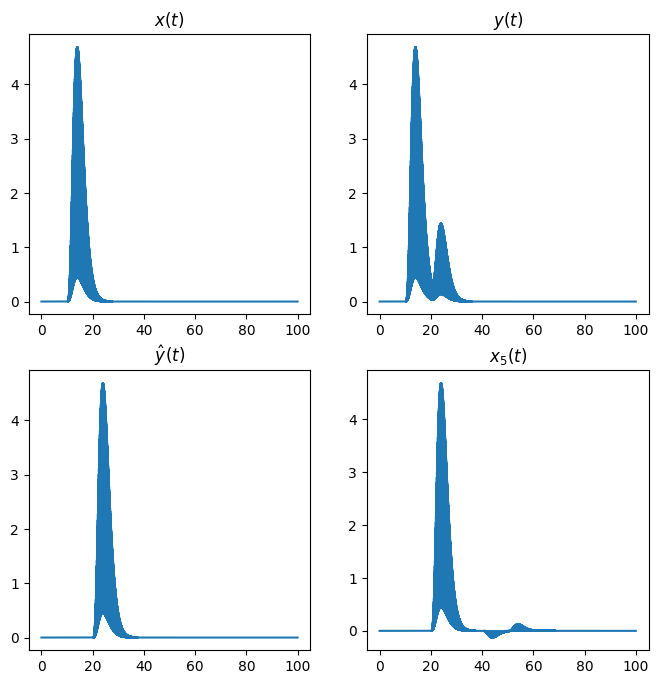

In [77]:
# Display plots:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('$x(t)$')
plt.plot(t,x(t,t0,f0))
plt.subplot(2,2,2)
plt.title('$y(t)$')
plt.plot(t,y(t,t0,f0))
plt.subplot(2,2,3)
plt.title('$\^y(t)$')
plt.plot(t,yhat)
plt.subplot(2,2,4)
plt.title('$x_5(t)$')
plt.plot(t,xm[2,:])
plt.show()

Due to the large width (in the time domain) of the $x(t)$ signal (more than $T_0$), some data is lost in the $y(t)$ signal, for this reason, even in $x_m(t)$ by removing the channel effect, it cannot be reconstructed and the error is never less than this value. It is not possible (even for very large $m$)